*BY: ISMAIL ABU SAIID*

# Heart Disease Prediction using Ensemble Learning

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import VotingClassifier

# Load the dataset
data = pd.read_csv("heart.csv")

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


<ipython-input-465-46cdd26e278a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

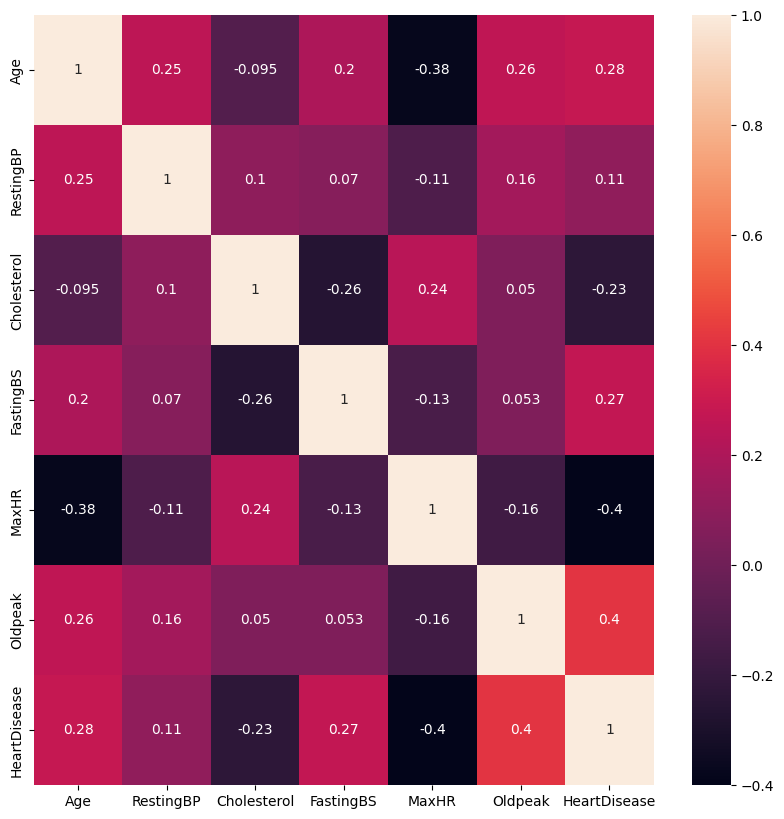

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Checking if any columns are highly correlated
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [ ]:
# Convert categorical features into dummy variables
encoded_data = pd.get_dummies(data)
print(encoded_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

In [ ]:
# Split the dataset into features and target variable
X = encoded_data.drop("HeartDisease", axis=1)
y = encoded_data["HeartDisease"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Accuracy: 0.8532608695652174


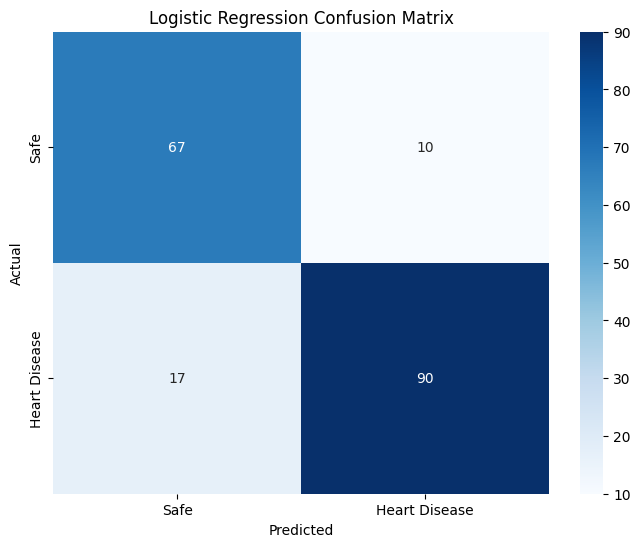

In [ ]:
# Logistic Regression Classifier
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_cm = confusion_matrix(y_test, lr_y_pred)

print("Logistic Regression Accuracy:", lr_accuracy)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.yticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.show()

Random Forest Accuracy: 0.8804347826086957


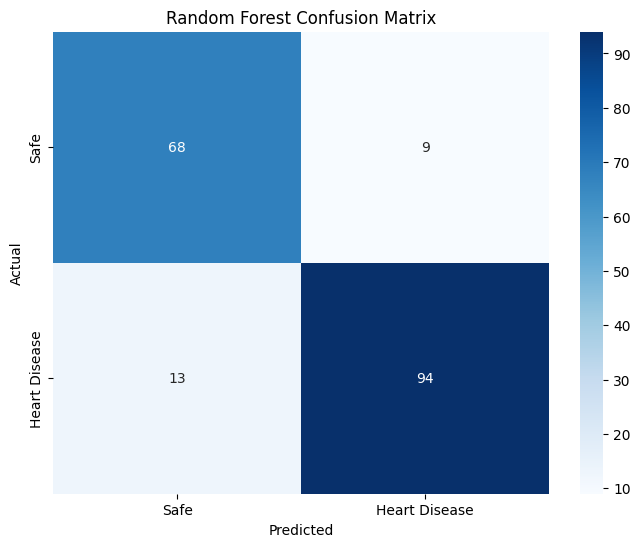

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_cm = confusion_matrix(y_test, rf_y_pred)

print("Random Forest Accuracy:", rf_accuracy)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.yticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.show()

Naive Bayes Accuracy: 0.8641304347826086


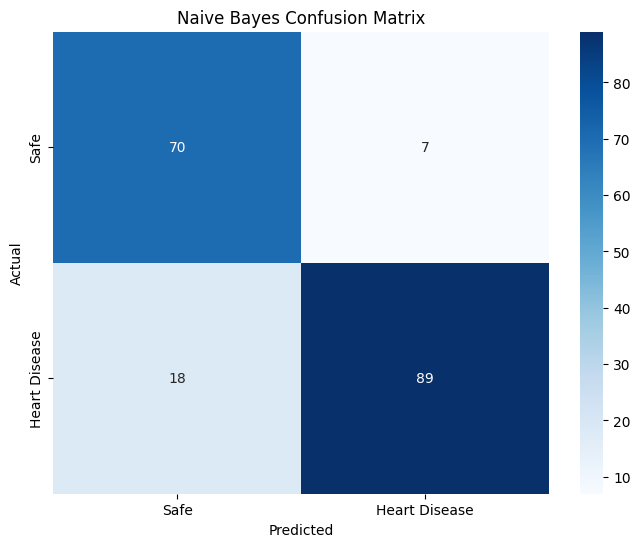

In [ ]:
# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_cm = confusion_matrix(y_test, nb_y_pred)

print("Naive Bayes Accuracy:", nb_accuracy)

plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.yticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.show()

Support Vector Machine Accuracy: 0.6902173913043478


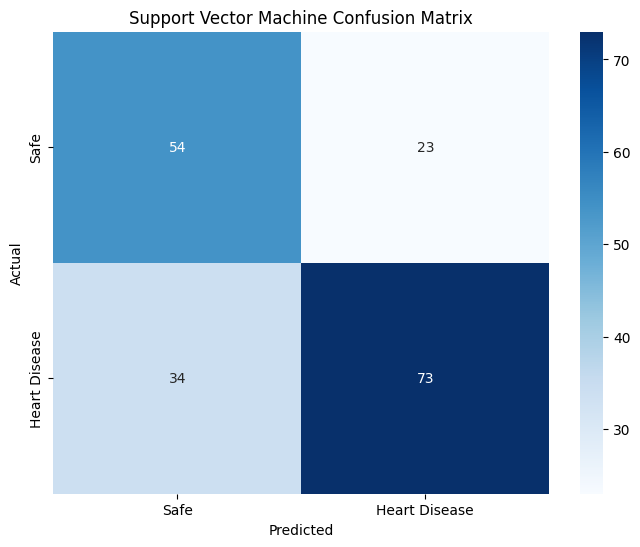

In [ ]:
# Support Vector Machine Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_cm = confusion_matrix(y_test, svm_y_pred)

print("Support Vector Machine Accuracy:", svm_accuracy)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Support Vector Machine Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.yticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.show()

XGBoost Accuracy: 0.875


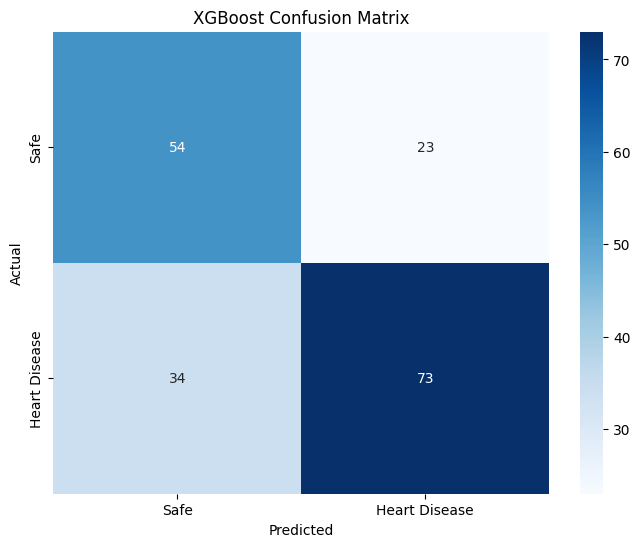

In [ ]:
# Combine models using XGBoost Classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_cm = confusion_matrix(y_test, xgb_y_pred)

print("XGBoost Accuracy:", xgb_accuracy)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.yticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.show()

Ensemble Accuracy(all): 0.8804347826086957


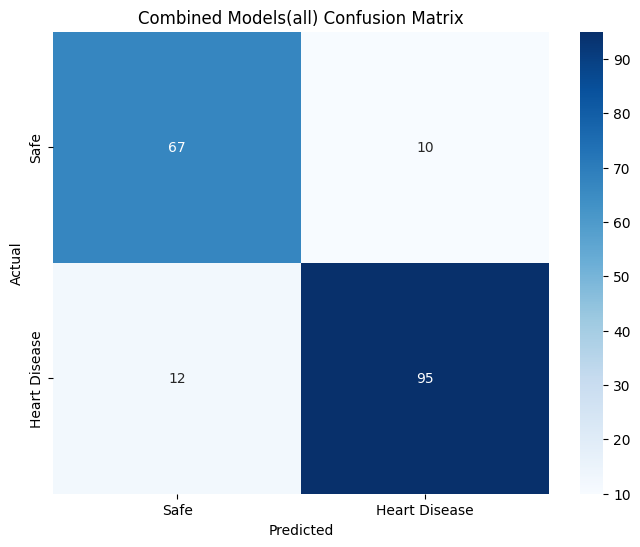

In [ ]:
# Combine all models using VotingClassifier
voting_model = VotingClassifier(
    estimators=[('lr', lr_model), ('svm', svm_model), ('nb', nb_model), ('random_forest', rf_model), ('xgb', xgb_model)],
    voting='hard'
)
voting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_model.predict(X_test)

# Evaluate the accuracy of the ensemble model
ensemble_accuracy_1 = accuracy_score(y_test, y_pred)
ensemble_cm = confusion_matrix(y_test, y_pred)

print("Ensemble Accuracy(all):", ensemble_accuracy_1)

plt.figure(figsize=(8, 6))
sns.heatmap(ensemble_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Combined Models(all) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.yticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.show()

Ensemble Accuracy(LR, SVM, RF, XGB): 0.875


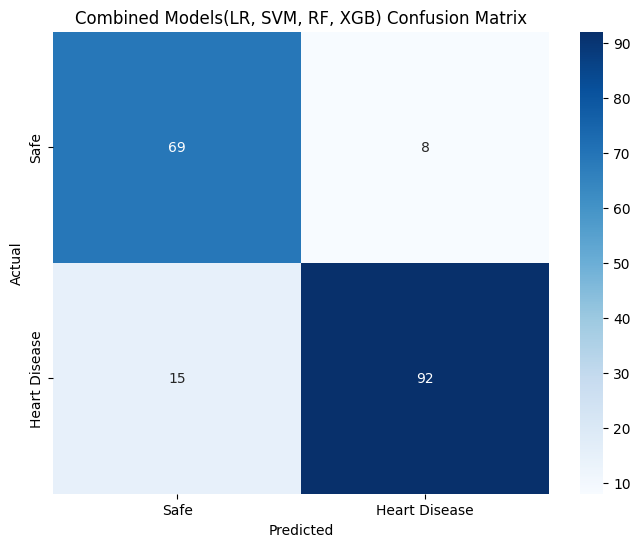

In [ ]:
# Combine selected models (LR, SVM, RF, XGB) using VotingClassifier
voting_model = VotingClassifier(
    estimators=[('lr', lr_model), ('svm', svm_model), ('random_forest', rf_model), ('xgb', xgb_model)],
    voting='hard'
)
voting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_model.predict(X_test)

# Evaluate the accuracy of the ensemble model
ensemble_accuracy_2 = accuracy_score(y_test, y_pred)
ensemble_cm = confusion_matrix(y_test, y_pred)

print("Ensemble Accuracy(LR, SVM, RF, XGB):", ensemble_accuracy_2)

plt.figure(figsize=(8, 6))
sns.heatmap(ensemble_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Combined Models(LR, SVM, RF, XGB) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.yticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.show()

Ensemble Accuracy(NB, RF, XGB): 0.9021739130434783


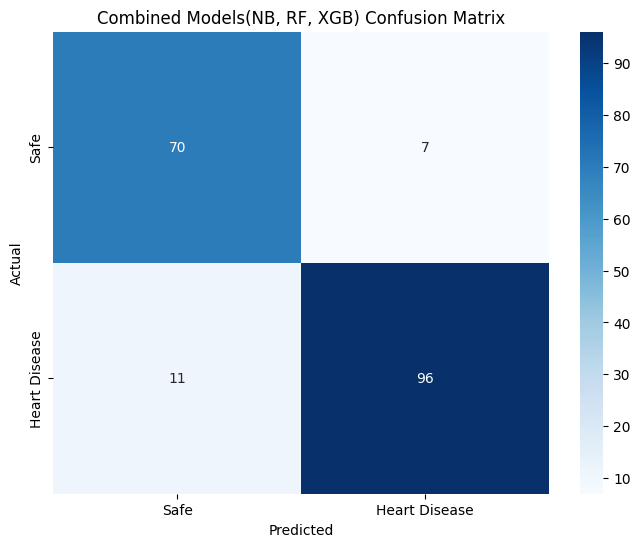

In [ ]:
# Combine selected (NB, RF, XGB) using VotingClassifier
voting_model = VotingClassifier(
    estimators=[('nb', nb_model), ('random_forest', rf_model), ('xgb', xgb_model)],
    voting='hard'
)
voting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_model.predict(X_test)

# Evaluate the accuracy of the ensemble model
ensemble_accuracy_3 = accuracy_score(y_test, y_pred)
ensemble_cm = confusion_matrix(y_test, y_pred)

print("Ensemble Accuracy(NB, RF, XGB):", ensemble_accuracy_3)

plt.figure(figsize=(8, 6))
sns.heatmap(ensemble_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Combined Models(NB, RF, XGB) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.yticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.show()

6/6 [==============================] - 0s 2ms/step
Stacked Model Accuracy: 0.8858695652173914


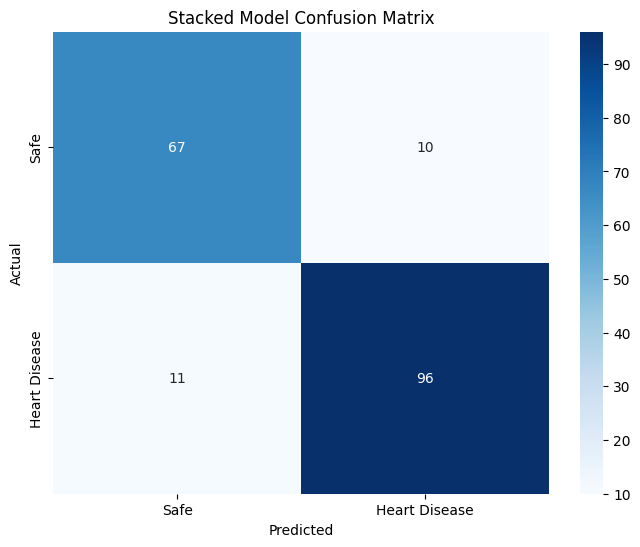

In [ ]:
# Using DNN to created a Stacked model

# Individual models
dnn_model = Sequential()
dnn_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
dnn_model.add(Dense(16, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))
dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
rf_model = RandomForestClassifier()
nb_model = GaussianNB()
svm_model = SVC(probability=True)
xgb_model = xgb.XGBClassifier()

# Train individual models
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions using individual models
dnn_pred_prob = dnn_model.predict(X_test).flatten()
dnn_pred = [1 if prob >= 0.5 else 0 for prob in dnn_pred_prob]

lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
nb_pred = nb_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Combine predictions as input features for the meta-model
stacked_features = pd.DataFrame({
    "DNN_Pred": dnn_pred,
    "LR_Pred": lr_pred,
    "RF_Pred": rf_pred,
    "NB_Pred": nb_pred,
    "SVM_Pred": svm_pred,
    "XGB_Pred": xgb_pred
})

# Meta-model (Logistic Regression, for example)
meta_model = LogisticRegression()
meta_model.fit(stacked_features, y_test)

# Make final predictions using the meta-model
stacked_pred = meta_model.predict(stacked_features)

# Calculate accuracy of the stacked model
stacked_accuracy = accuracy_score(y_test, stacked_pred)
print("Stacked Model Accuracy:", stacked_accuracy)

# Calculate confusion matrix of the stacked model
stacked_cm = confusion_matrix(y_test, stacked_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(stacked_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Stacked Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.yticks([0.5, 1.5], ["Safe", "Heart Disease"])
plt.show()

In [ ]:
# Results

print("Models:")
print("Logistic Regression Accuracy:        ", round(lr_accuracy, 3))
print("Random Forest Accuracy:              ", round(rf_accuracy, 3))
print("Naive Bayes Accuracy:                ", round(nb_accuracy, 3))
print("Support Vector Machine Accuracy:     ", round(svm_accuracy, 3))
print("XGBoost Accuracy:                    ", round(xgb_accuracy, 3))


print("\nCombining Models using VotingClassifier")
print("Combined Accuracy(all):              ", round(ensemble_accuracy_1, 3))
print("Combined Accuracy(LR, SVM, RF, XGB): ", round(ensemble_accuracy_2, 3))
print("Combined Accuracy(NB, RF, XGB):      ", round(ensemble_accuracy_3, 3))

print("\nUsing DNN to created a Stacked model")
print("Stacked Model Accuracy:              ", round(stacked_accuracy, 3))


Models:
Logistic Regression Accuracy:         0.853
Random Forest Accuracy:               0.88
Naive Bayes Accuracy:                 0.864
Support Vector Machine Accuracy:      0.69
XGBoost Accuracy:                     0.875

Combining Models using VotingClassifier
Combined Accuracy(all):               0.88
Combined Accuracy(LR, SVM, RF, XGB):  0.875
Combined Accuracy(NB, RF, XGB):       0.902

Using DNN to created a Stacked model
Stacked Model Accuracy:               0.886
